In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

#將「輸入層」與「隱藏層」加入模型

model.add(Dense(units=1000,
  input_dim=784,
  kernel_initializer='normal',
  activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=10,
  kernel_initializer='normal',
  activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
  y=y_Train_OneHot,validation_split=0.2,
  epochs=10, batch_size=200,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3606 - acc: 0.8927 - val_loss: 0.1623 - val_acc: 0.9546
Epoch 2/10
 - 7s - loss: 0.1605 - acc: 0.9531 - val_loss: 0.1170 - val_acc: 0.9663
Epoch 3/10
 - 7s - loss: 0.1164 - acc: 0.9651 - val_loss: 0.0990 - val_acc: 0.9713
Epoch 4/10
 - 7s - loss: 0.0924 - acc: 0.9722 - val_loss: 0.0910 - val_acc: 0.9727
Epoch 5/10
 - 7s - loss: 0.0753 - acc: 0.9773 - val_loss: 0.0821 - val_acc: 0.9749
Epoch 6/10
 - 7s - loss: 0.0626 - acc: 0.9804 - val_loss: 0.0759 - val_acc: 0.9773
Epoch 7/10
 - 7s - loss: 0.0537 - acc: 0.9842 - val_loss: 0.0788 - val_acc: 0.9770
Epoch 8/10
 - 6s - loss: 0.0483 - acc: 0.9859 - val_loss: 0.0731 - val_acc: 0.9789
Epoch 9/10
 - 7s - loss: 0.0437 - acc: 0.9858 - val_loss: 0.0684 - val_acc: 0.9791
Epoch 10/10
 - 7s - loss: 0.0374 - acc: 0.9885 - val_loss: 0.0667 - val_acc: 0.9800


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

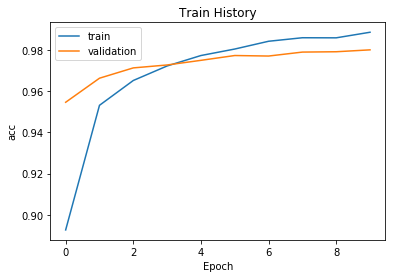

In [0]:
show_train_history(train_history,'acc','val_acc')

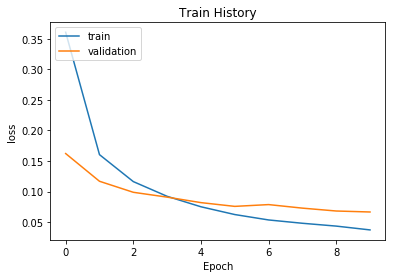

In [0]:
show_train_history(train_history,'loss','val_loss')

In [0]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 95us/step

accuracy= 0.9814


In [0]:
prediction=model.predict_classes(x_Test)

prediction

array([7, 2, 1, ..., 4, 5, 6])

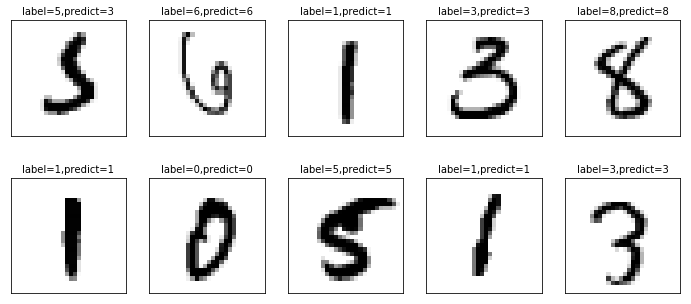

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
    prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    title= "label=" +str(labels[idx])
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])
      
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()
  
plot_images_labels_prediction(x_test_image,y_test_label,
  prediction,idx=340)

In [0]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
  rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,1,1,0,0,1,1,2,0
1,0,1127,4,0,0,0,1,0,3,0
2,4,1,1013,1,4,0,2,4,3,0
3,1,0,0,997,0,2,0,3,3,4
4,0,0,4,0,968,0,1,0,2,7
5,3,0,0,14,1,860,5,2,5,2
6,4,2,0,1,9,3,936,0,3,0
7,1,7,8,2,1,0,0,1001,4,4
8,5,0,1,10,4,1,1,2,948,2


In [0]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [0]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2291,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4355,5,3


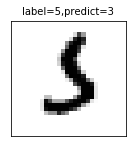

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=340,num=1)

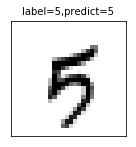

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label
  ,prediction,idx=1289,num=1)